In [1]:
import os

%load_ext autoreload
%autoreload 2

"""
To make final (MS) figures (pretty) for shape category neural psycho.
This links to script: /home/lucas/code/neuralmonkey/neuralmonkey/scripts/analy_decode_moment_psychometric.py
Older notebook more fleshed out, where devoed the code in that scrpt: /home/lucas/code/neuralmonkey/neuralmonkey/notebooks_tutorials/240617_momentbymoment_decode_psychoprim.ipynb

Focus here is on SWITCHING morph expts.
"""

'\nTo make final (MS) figures (pretty) for shape category neural psycho.\nThis links to script: /home/lucas/code/neuralmonkey/neuralmonkey/scripts/analy_decode_moment_psychometric.py\nOlder notebook more fleshed out, where devoed the code in that scrpt: /home/lucas/code/neuralmonkey/neuralmonkey/notebooks_tutorials/240617_momentbymoment_decode_psychoprim.ipynb\n\nFocus here is on SWITCHING morph expts.\n'

# Load a dataset

In [2]:
from neuralmonkey.scripts.analy_dfallpa_extract import extract_dfallpa_helper
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion
from neuralmonkey.classes.population_mult import extract_single_pa
from neuralmonkey.metadat.analy.anova_params import params_getter_euclidian_vars
from neuralmonkey.classes.population_mult import dfpa_concatbregion_preprocess_clean_bad_channels, dfpa_concatbregion_preprocess_wrapper
from pythonlib.tools.pandastools import append_col_with_grp_index
import seaborn as sns
from pythonlib.tools.plottools import savefig
import os
from neuralmonkey.classes.population_mult import extract_single_pa
from neuralmonkey.analyses.state_space_good import euclidian_distance_compute_trajectories_single, euclidian_distance_compute_trajectories


In [ ]:
animal = "Diego"
date = 240517

# animal = "Pancho"
# date = 240524
SAVEDIR_ALL = f"/tmp/PSYCHO_SP/{animal}-{date}"
os.makedirs(SAVEDIR_ALL, exist_ok=True)


In [ ]:
from neuralmonkey.scripts.analy_dfallpa_extract import extract_dfallpa_helper

question = "SP_psycho_trial"
which_level = "trial"
fr_normalization_method = "across_time_bins" # Slightly better
LIST_BREGION_IGNORE = ["FP", "FP_p", "FP_a"]
COMBINE_AREAS = True

#####################################
# Method 2 - Combine two dfallpa
DFallpa = load_handsaved_wrapper(animal=animal, date=date, version="trial", combine_areas=COMBINE_AREAS, question=question)

#################### PREPROCESSING
from neuralmonkey.classes.population_mult import dfpa_concatbregion_preprocess_clean_bad_channels, dfpa_concatbregion_preprocess_wrapper
dfpa_concatbregion_preprocess_wrapper(DFallpa, animal, date, fr_mean_subtract_method=fr_normalization_method)

from neuralmonkey.scripts.analy_pig_decode_moment_syntaxTI import dfallpa_preprocess_condition
shape_var_suff = "shape"
loc_var_suff = "loc"
dfallpa_preprocess_condition(DFallpa, shape_var_suff, loc_var_suff)

from neuralmonkey.analyses.decode_moment import analy_psychoprim_prepare_beh_dataset
savedir = f"{SAVEDIR_ALL}/morphsets_drawings"
os.makedirs(savedir, exist_ok=True)
DSmorphsets, map_tc_to_morph_info, map_morphset_to_basemorphinfo, map_tcmorphset_to_idxmorph, map_tcmorphset_to_info, \
    map_morphsetidx_to_assignedbase_or_ambig, map_tc_to_morph_status = analy_psychoprim_prepare_beh_dataset(animal, date, savedir)

# Hacky, remove trialcodes that are by eye messy
from pythonlib.dataset.dataset_analy.psychometric_singleprims import params_good_morphsets_switching_ignore_trialcodes
trialcodes_ignore = params_good_morphsets_switching_ignore_trialcodes(animal, date)

# Prune neural data to keep only good triacldoes.
list_trialcode = DSmorphsets.Dat["trialcode"].unique().tolist() # trialcodes that are in DSmorphsets
list_trialcode = [tc for tc in list_trialcode if tc not in trialcodes_ignore]

# Do prune
DFallpa["pa"] = [pa.slice_by_labels("trials", "trialcode", list_trialcode) for pa in DFallpa["pa"].values]


##### Scratch -- loading DFDIST and remaking RSA plot (using new color map)

In [3]:
import os
import pickle

path = "/lemur2/lucas/analyses/recordings/main/decode_moment/PSYCHO_SP/TEMP_STORE_RUNNING_PANCHO_PMvl/Pancho-240524-logistic-combine=True/analy_switching_GOOD_euclidian_index/ev=03_samp-scal=traj-dimred=dpca-twind=(-0.3, 1.2)-npcs=8/bregion=PMv/morphset=8/DFDIST.pkl"

with open(path, "rb") as f:
    DFDIST = pickle.load(f)

In [4]:
DFDIST

,idx_row_datapt,trialcode,time_bin_idx,labels_1_datapt,labels_2_grp,dist_mean,DIST_50,DIST_98,dist_norm,dist_yue_diff,time_bin,idxmorph_assigned,seqc_0_loc,idxmorph_assigned_1,idxmorph_assigned_2,idxmorph_assigned_12,idxmorph_assigned_same,seqc_0_loc_1,seqc_0_loc_2,seqc_0_loc_12,seqc_0_loc_same,same-idxmorph_assigned|seqc_0_loc,i_outer,assigned_base_simple,assigned_base,assigned_label,idx_morph_temp
0,0,240524-1-17,0,"(99|base2, (0, 1))","(0|base1, (1, 0))",0.802492,0.828726,1.287596,0.623052,-999.0,-0.196,99|base2,"(0, 1)",99|base2,0|base1,99|base2|0|base1,False,"(0, 1)","(1, 0)","(0, 1)|(1, 0)",False,0|0,0,base2,base2,base,99
1,0,240524-1-17,0,"(99|base2, (0, 1))","(99|base2, (1, 0))",0.739846,0.828726,1.287596,0.574333,-999.0,-0.196,99|base2,"(0, 1)",99|base2,99|base2,99|base2|99|base2,True,"(0, 1)","(1, 0)","(0, 1)|(1, 0)",False,1|0,0,base2,base2,base,99
2,0,240524-1-17,1,"(99|base2, (0, 1))","(0|base1, (1, 0))",0.826702,0.828625,1.283267,0.644121,-999.0,-0.176,99|base2,"(0, 1)",99|base2,0|base1,99|base2|0|base1,False,"(0, 1)","(1, 0)","(0, 1)|(1, 0)",False,0|0,0,base2,base2,base,99
3,0,240524-1-17,1,"(99|base2, (0, 1))","(99|base2, (1, 0))",0.751688,0.828625,1.283267,0.585690,-999.0,-0.176,99|base2,"(0, 1)",99|base2,99|base2,99|base2|99|base2,True,"(0, 1)","(1, 0)","(0, 1)|(1, 0)",False,1|0,0,base2,base2,base,99
4,0,240524-1-17,2,"(99|base2, (0, 1))","(0|base1, (1, 0))",0.828170,0.832756,1.289154,0.642479,-999.0,-0.156,99|base2,"(0, 1)",99|base2,0|base1,99|base2|0|base1,False,"(0, 1)","(1, 0)","(0, 1)|(1, 0)",False,0|0,0,base2,base2,base,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18055,128,240524-1-1291,67,"(99|base2, (1, 0))","(99|base2, (0, 1))",0.845619,0.942688,1.560291,0.542070,-999.0,1.144,99|base2,"(1, 0)",99|base2,99|base2,99|base2|99|base2,True,"(1, 0)","(0, 1)","(1, 0)|(0, 1)",False,1|0,0,base2,base2,base,99
18056,128,240524-1-1291,68,"(99|base2, (1, 0))","(0|base1, (0, 1))",0.829019,0.964926,1.601504,0.517843,-999.0,1.164,99|base2,"(1, 0)",99|base2,0|base1,99|base2|0|base1,False,"(1, 0)","(0, 1)","(1, 0)|(0, 1)",False,0|0,0,base2,base2,base,99
18057,128,240524-1-1291,68,"(99|base2, (1, 0))","(99|base2, (0, 1))",0.871276,0.964926,1.601504,0.544059,-999.0,1.164,99|base2,"(1, 0)",99|base2,99|base2,99|base2|99|base2,True,"(1, 0)","(0, 1)","(1, 0)|(0, 1)",False,1|0,0,base2,base2,base,99
18058,128,240524-1-1291,69,"(99|base2, (1, 0))","(0|base1, (0, 1))",0.848459,0.989188,1.648527,0.514970,-999.0,1.184,99|base2,"(1, 0)",99|base2,0|base1,99|base2|0|base1,False,"(1, 0)","(0, 1)","(1, 0)|(0, 1)",False,0|0,0,base2,base2,base,99


(<Figure size 1500x400 with 4 Axes>,
 array([<Axes: title={'center': 'dummy'}, xlabel='idxmorph_assigned_2', ylabel='idxmorph_assigned_1'>,
        <Axes: >, <Axes: >], dtype=object))

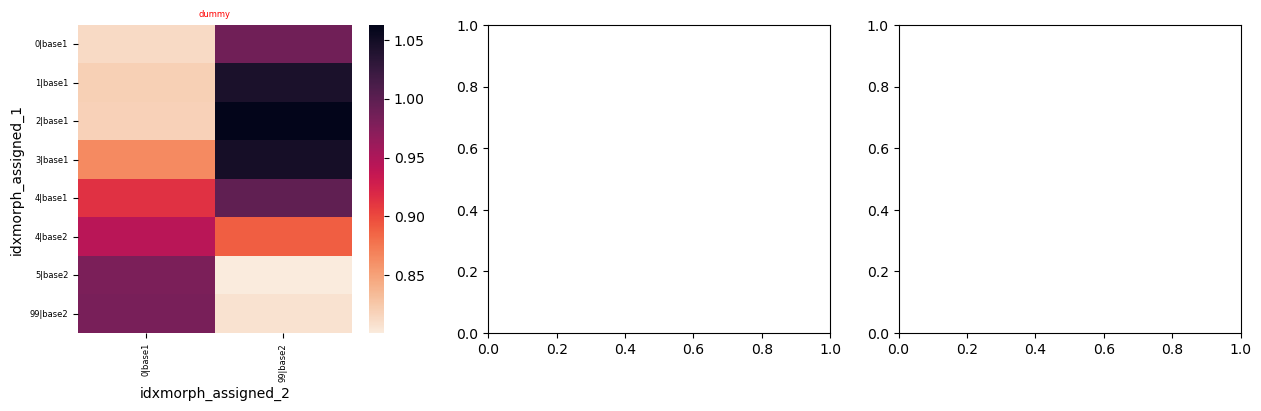

In [5]:
from pythonlib.tools.pandastools import plot_subplots_heatmap
plot_subplots_heatmap(DFDIST, "idxmorph_assigned_1", "idxmorph_assigned_2", "dist_mean", None, False)

# All analyses

### Devo

##### Preprocess

In [ ]:
from neuralmonkey.analyses.state_space_good import trajgood_plot_colorby_splotby_WRAPPER, trajgood_plot_colorby_splotby_scalar_WRAPPER
from neuralmonkey.scripts.analy_decode_moment_psychometric import analy_switching_GOOD_state_space, analy_extract_PA_conditioned, analy_switching_statespace_euclidian_good, analy_switching_statespace_euclidian_traj, _analy_switching_statespace_euclidian_traj_condition, _analy_switching_statespace_euclidian_traj_plots, _analy_extract_PA_dim_reduction

In [ ]:
TWIND_ANALY = (-0.6, 1.0) # This is just for windowing final data, not for fitting pca.
morphset = 1
SAVEDIR = f"{SAVEDIR_ALL}/morphset={morphset}"


In [ ]:
savedir = f"{SAVEDIR}/preprocess"
os.makedirs(savedir, exist_ok=True)

In [ ]:
raw_subtract_mean_each_timepoint = False
NPCS_KEEP = 8
scalar_or_traj = "traj"
# Then can take longer time window
tbin_dur = 0.2
tbin_slide = 0.05

bregion = "M1"

fit_twind = (0.05, 0.9)

dim_red_method = "dpca"
EVENT = "03_samp"

final_twind = TWIND_ANALY

_, PAredu = analy_extract_PA_conditioned(DFallpa, bregion, morphset, map_tcmorphset_to_idxmorph, map_tcmorphset_to_info,
                                            scalar_or_traj, EVENT, raw_subtract_mean_each_timepoint, 
                    dim_red_method, final_twind, tbin_dur, tbin_slide, NPCS_KEEP, 
                    savedir, restricted_twind_for_dpca=fit_twind, exclude_flankers=True)


In [ ]:
dflab = PAredu.Xlabels["trials"]
dflab["seqc_0_loc"].value_counts()

In [ ]:
from pythonlib.tools.pandastools import grouping_plot_n_samples_conjunction_heatmap
grouping_plot_n_samples_conjunction_heatmap(dflab, "idxmorph_assigned", "seqc_0_loc")

##### Devo --- dist index, generalizing across locations

In [ ]:
from neuralmonkey.scripts.analy_decode_moment_psychometric import _compute_df_using_dist_index_traj

In [ ]:
pa = PAredu.agg_by_time_windows_binned(0.2, 0.1)

In [ ]:
### Get single trial pairwise distances over time.
var_effect = "idxmorph_assigned"
effect_lev_base1 = "0|base1"
effect_lev_base2 = "99|base2"
list_grps_get = [
    ("0|base1",),  
    ("99|base2",)
    ] # This is important, or else will fail if there are any (idx|assign) with only one datapt.

var_context_diff = "seqc_0_loc"
dfproj_index_ctxt, dfdist_ctxt, _, _, _ = _compute_df_using_dist_index_traj(pa, var_effect, effect_lev_base1, effect_lev_base2,
                                                                                        list_grps_get=list_grps_get,
                                                                                        var_context_diff=var_context_diff)

var_context_diff = None
dfproj_index, dfdist, _, _, _ = _compute_df_using_dist_index_traj(pa, var_effect, effect_lev_base1, effect_lev_base2,
                                                                                        list_grps_get=list_grps_get,
                                                                                        var_context_diff=var_context_diff)


In [ ]:
dfproj_index_ctxt

In [ ]:
dfproj_index

In [ ]:
hue_order = sorted(dfproj_index["idxmorph_assigned"].unique())

In [ ]:
sns.relplot(data=dfproj_index_ctxt, x="time_bin", y="dist_index", hue="idxmorph_assigned", kind="line", hue_order=hue_order)
sns.relplot(data=dfproj_index, x="time_bin", y="dist_index", hue="idxmorph_assigned", kind="line", hue_order=hue_order)

##### State space (trajectories)

In [ ]:
savedir = f"{SAVEDIR}/state_space"
os.makedirs(savedir, exist_ok=True)

In [ ]:
analy_switching_statespace_euclidian_good(PAredu, savedir) 

##### Analysis -- distance scores (convert to distance index)


In [ ]:
savedir = f"{SAVEDIR}/dist_index"
os.makedirs(savedir, exist_ok=True)

In [ ]:
### Analysus -- single trials, adn timecourses
analy_switching_statespace_euclidian_traj(PAredu, savedir)


### FINAL GOOD PLOTS

In [ ]:
from pythonlib.tools.statstools import stratified_kfold_single_test


### State space plots

In [ ]:

list_morphset = [1,8]
analy_switching_GOOD_state_space(DFallpa, SAVEDIR_ALL, map_tcmorphset_to_idxmorph, list_morphset, map_tcmorphset_to_info)

### Euclidian distance plots

In [ ]:
SAVEDIR_ALL = "/tmp/PSYCHO_EUCL"
os.makedirs(SAVEDIR_ALL, exist_ok=True)

In [ ]:
from neuralmonkey.scripts.analy_decode_moment_psychometric import analy_switching_GOOD_euclidian_index
list_morphset = [1, 5]
analy_switching_GOOD_euclidian_index(DFallpa, SAVEDIR_ALL, map_tcmorphset_to_idxmorph, list_morphset, map_tcmorphset_to_info)


### [Load Mult] for dist index results (analy_switching_GOOD_euclidian_index)

In [5]:
from pythonlib.dataset.dataset_analy.psychometric_singleprims import params_good_morphsets_switching
from neuralmonkey.scripts.analy_decode_moment_psychometric import _analy_switching_statespace_euclidian_traj_plots, _analy_switching_statespace_euclidian_traj_computediff
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items_good
from neuralmonkey.classes.session import _REGIONS_IN_ORDER_COMBINED
from pythonlib.tools.plottools import savefig
from pythonlib.tools.pandastools import aggregGeneral, extract_with_levels_of_conjunction_vars
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
LIST_TWINDSCAL_SUFF = [[(0.05, 1.1), "all"], [(0.65, 1.1), "late"], [(0.05,  0.65), "early"]]


In [3]:
# event = "03_samp"

LIST_EXPTS = [("Diego", 240517), ("Diego", 240521), ("Diego", 240523), ("Diego", 240730), 
              ("Pancho", 240516), ("Pancho", 240521), ("Pancho", 240524)]
# LIST_EXPTS = [("Diego", 240517), ("Diego", 240521), ("Diego", 240523), ("Diego", 240730), 
#               ("Pancho", 240516), ("Pancho", 240524)]

LIST_REGIONS = _REGIONS_IN_ORDER_COMBINED

# exclude_flank = True
# dim_red_method = "dpca"
# # proj_twind = (0.1, 1.0)
# # combine = True
# # raw_subtract_mean_each_timepoint = False
# scalar_or_traj = "traj"
# NPCS_KEEP = 8

# twind_final = (-0.3, 1.2)

In [ ]:
from pythonlib.tools.pandastools import aggregGeneral

HACK = False
# var_context_diff = "seqc_0_loc"
event = "03_samp"
twind_final = (-0.3, 1.2)
scalar_or_traj = "traj"
dim_red_method = "dpca"
NPCS_KEEP = 8

# list_dfdist = []
for var_context_diff in [None, "seqc_0_loc"]:
    for do_prune_ambig in [True, False]:

        ######################### LOAD DATA
        # list_dfdist_agg = []
        list_dfproj_index = []
        list_dfproj_index_agg = []
        for animal, date in LIST_EXPTS:
            map_morphsetgood_to_indices = params_good_morphsets_switching(animal, date)
            for bregion in LIST_REGIONS:
                for morphset, inds_keep in map_morphsetgood_to_indices.items():     

                    if len(inds_keep)==0:
                        # hand label not inlcudes this morphset...
                        continue

                    from neuralmonkey.scripts.analy_euclidian_chars_sp import load_euclidian_time_resolved_fast_shuffled
                    _, dfdist_agg, dfproj_index, dfproj_index_agg = load_euclidian_time_resolved_fast_shuffled(animal, 
                                                                                                date, bregion, morphset, 
                                                                                                inds_keep, do_prune_ambig,
                                                                                                var_context_diff,
                                                                                                event=event, twind_final=twind_final,
                                                                                                scalar_or_traj=scalar_or_traj,
                                                                                                dim_red_method=dim_red_method,
                                                                                                NPCS_KEEP=NPCS_KEEP)
                    if False:
                        # not actually using it
                        list_dfdist_agg.append(dfdist_agg)
                    list_dfproj_index.append(dfproj_index)
                    list_dfproj_index_agg.append(dfproj_index_agg)
        ######################### DONE LOAD DATA

        #### Analysis
        for do_clean_labels in [False, True]:

            SAVEDIR = f"/lemur2/lucas/analyses/recordings/main/decode_moment/PSYCHO_SP/MULT_BREGION/analy_switching_GOOD_euclidian_index/ev={event}-scal={scalar_or_traj}-dimred={dim_red_method}-twind={twind_final}-npcs={NPCS_KEEP}-cleanlabs={do_clean_labels}-dopruneambig={do_prune_ambig}-var_context_diff={var_context_diff}"
            savedir = SAVEDIR
            os.makedirs(savedir, exist_ok=True)

            if False: # not being used
                DFDIST = pd.concat(list_dfdist).reset_index(drop=True)
                DFDIST_AGG = pd.concat(list_dfdist_agg).reset_index(drop=True)
            DFPROJ_INDEX = pd.concat(list_dfproj_index).reset_index(drop=True)
            DFPROJ_INDEX_AGG = pd.concat(list_dfproj_index_agg).reset_index(drop=True)

            # Round the times to nearest ms
            DFPROJ_INDEX_AGG["time_bin"] = np.round(DFPROJ_INDEX_AGG["time_bin"]*1000)/1000
            DFPROJ_INDEX["time_bin"] = np.round(DFPROJ_INDEX["time_bin"]*1000)/1000

            # del list_dfdist, list_dfdist_agg, list_dfproj_index, list_dfproj_index_agg

            from pythonlib.tools.pandastools import append_col_with_grp_index
            DFPROJ_INDEX = append_col_with_grp_index(DFPROJ_INDEX, ["animal", "date", "morphset"], "an_da_ms")
            DFPROJ_INDEX_AGG = append_col_with_grp_index(DFPROJ_INDEX_AGG, ["animal", "date", "morphset"], "an_da_ms")

            if False:
                DFDIST_AGG["time_bin"] = np.round(DFDIST_AGG["time_bin"]*1000)/1000
                DFDIST_AGG = append_col_with_grp_index(DFDIST_AGG, ["animal", "date", "morphset"], "an_da_ms")

            ### OPTIONALLY, clean to just morphsets with both bases for all 3 labels
            if do_clean_labels:
                ### First, each of (ambig, base, notambig) should have both bas1 and badses2
                vars_others = ["an_da_ms", "assigned_label", "seqc_0_loc"]
                levels_var = ["base1", "base2"]
                DFPROJ_INDEX, _= extract_with_levels_of_conjunction_vars(DFPROJ_INDEX, "assigned_base_simple", vars_others, levels_var, 
                                                        1, False, 2, False, plot_counts_heatmap_savepath=None)

                DFPROJ_INDEX_AGG, _= extract_with_levels_of_conjunction_vars(DFPROJ_INDEX_AGG, "assigned_base_simple", vars_others, levels_var, 
                                                        1, False, 2, False, plot_counts_heatmap_savepath=None)
                
                if False:
                    DFDIST_AGG, _= extract_with_levels_of_conjunction_vars(DFDIST_AGG, "assigned_base_simple", vars_others, levels_var, 
                                                            1, False, 2, False, plot_counts_heatmap_savepath=None)
                
                # Second, only morphsets with all (3 labels x 2 base1/base2)
                vars_others = ["an_da_ms", "seqc_0_loc"]
                levels_var = ["not_ambig", "base", "ambig"]
                DFPROJ_INDEX, _= extract_with_levels_of_conjunction_vars(DFPROJ_INDEX, "assigned_label", vars_others, levels_var, 
                                                        1, False, len(levels_var), False, plot_counts_heatmap_savepath=None)

                DFPROJ_INDEX_AGG, _= extract_with_levels_of_conjunction_vars(DFPROJ_INDEX_AGG, "assigned_label", vars_others, levels_var, 
                                                        1, False, len(levels_var), False, plot_counts_heatmap_savepath=None)

                if False:
                    DFDIST_AGG, _= extract_with_levels_of_conjunction_vars(DFDIST_AGG, "assigned_label", vars_others, levels_var, 
                                                            1, False, len(levels_var), False, plot_counts_heatmap_savepath=None)


            ### Agg over locations, for
            # Agg over locations
            if False:
                DFPROJ_INDEX_AGG = aggregGeneral(DFPROJ_INDEX_AGG, ["an_da_ms", "bregion", "idxmorph_assigned", "time_bin_idx"], ["dist_index", "dist_index_norm", "time_bin"], nonnumercols=["assigned_base_simple", "assigned_base", "assigned_label"])

            # (2) Get different of dist (base2-base1)
            from pythonlib.tools.nptools import isnear
            # A single score (difference of dist index)
            grpdict = grouping_append_and_return_inner_items_good(DFPROJ_INDEX_AGG, ["animal", "date", "morphset", "bregion", "seqc_0_loc"])

            # - get for each (animal, date, morphset)
            res = []
            res2 = []
            times = None
            for (animal, date, morphset, bregion, seqc_0_loc), inds in grpdict.items():
                print(animal, date, morphset)
                df = DFPROJ_INDEX_AGG.iloc[inds].reset_index(drop=True)
                _times, dist_index_diff_base, dist_index_diff_notambig, dist_index_diff_ambig = _analy_switching_statespace_euclidian_traj_computediff(df)
                if times is not None:
                    assert isnear(_times, times)
                else:
                    times = _times

                label = "base"
                for i, (t, d) in enumerate(zip(times, dist_index_diff_base)):
                    res2.append({
                        "animal":animal,
                        "date":date, 
                        "morphset":morphset,
                        "bregion":bregion,
                        "seqc_0_loc":seqc_0_loc,
                        "time_bin":t, 
                        "time_bin_idx":i, 
                        "dist_index_diff":d,
                        "label":label
                    })

                if dist_index_diff_notambig is not None:
                    label = "not_ambig"
                    for i, (t, d) in enumerate(zip(times, dist_index_diff_notambig)):
                        res2.append({
                            "animal":animal,
                            "date":date, 
                            "morphset":morphset,
                            "bregion":bregion,
                            "seqc_0_loc":seqc_0_loc,
                            "time_bin":t, 
                            "time_bin_idx":i, 
                            "dist_index_diff":d,
                            "label":label
                        })

                if dist_index_diff_ambig is not None:
                    label = "ambig"
                    for i, (t, d) in enumerate(zip(times, dist_index_diff_ambig)):
                        res2.append({
                            "animal":animal,
                            "date":date, 
                            "morphset":morphset,
                            "bregion":bregion,
                            "seqc_0_loc":seqc_0_loc,
                            "time_bin":t, 
                            "time_bin_idx":i, 
                            "dist_index_diff":d,
                            "label":label
                        })

            DFPROJ_INDEX_AGG_DIFF_LOCS = pd.DataFrame(res2)
            DFPROJ_INDEX_AGG_DIFF_LOCS = append_col_with_grp_index(DFPROJ_INDEX_AGG_DIFF_LOCS, ["animal", "date", "morphset"], "an_da_ms")
        
            # Agg one more time, to average over locations.
            DFPROJ_INDEX_AGG_DIFF = aggregGeneral(DFPROJ_INDEX_AGG_DIFF_LOCS, ["an_da_ms", "bregion", "time_bin_idx", "label"], ["dist_index_diff", "time_bin"], 
                                            nonnumercols=["animal", "date", "morphset"])
            

            if HACK:
                assert False

            ############### PLOTS
            # (1) Heatmaps

            # (1) Catplots
            import seaborn as sns
            hue_order = ["base1", "not_ambig_base1", "ambig_base1", "ambig_base2", "not_ambig_base2", "base2"]
            fig = sns.relplot(data=DFPROJ_INDEX_AGG, x="time_bin", y="dist_index", hue="assigned_base", kind="line", errorbar=("ci", 68),
                            col = "bregion", row="animal", hue_order=hue_order)
            for ax in fig.axes.flatten():
                ax.axhline(0.5, color="k", alpha=0.25)
                ax.axvline(0, color="k", alpha=0.25)
            savefig(fig, f"{savedir}/DFPROJ_INDEX_AGG-dist_index-assigned_base.pdf")

            hue_order = ["base1", "not_ambig_base1", "ambig_base1", "ambig_base2", "not_ambig_base2", "base2"]
            fig = sns.relplot(data=DFPROJ_INDEX_AGG, x="time_bin", y="dist_index", hue="assigned_base", kind="line", errorbar=("ci", 68),
                            col = "an_da_ms", col_wrap = 6, hue_order=hue_order)
            for ax in fig.axes.flatten():
                ax.axhline(0.5, color="k", alpha=0.25)
                ax.axvline(0, color="k", alpha=0.25)
            savefig(fig, f"{savedir}/DFPROJ_INDEX_AGG-dist_index-assigned_base-2.pdf")

            for animal in DFPROJ_INDEX_AGG["animal"].unique().tolist():
                dfthis = DFPROJ_INDEX_AGG[DFPROJ_INDEX_AGG["animal"]==animal].reset_index(drop=True)

                hue_order = sorted(dfthis["assigned_base_simple"].unique())
                fig = sns.relplot(data=dfthis, x="time_bin", y="dist_index", hue="assigned_base_simple", 
                                row="assigned_label", col="bregion", kind="line", errorbar=("ci", 68), hue_order=hue_order)
                for ax in fig.axes.flatten():
                    ax.axhline(0.5, color="k", alpha=0.25)
                    ax.axvline(0, color="k", alpha=0.25)
                savefig(fig, f"{savedir}/DFPROJ_INDEX_AGG-dist_index-assigned_base_simple-{animal}.pdf")
            plt.close("all")


            # Plot
            for row in [None, "animal"]:
                hue_order = ["base", "not_ambig", "ambig"]
                fig = sns.relplot(data=DFPROJ_INDEX_AGG_DIFF, x="time_bin", y="dist_index_diff", hue="label", 
                                kind="line", errorbar=("ci", 68), col = "bregion", row=row, hue_order=hue_order,
                                col_order=LIST_REGIONS)
                for ax in fig.axes.flatten():
                    ax.axhline(0, color="k", alpha=0.25)
                    ax.axvline(0, color="k", alpha=0.25)
                savefig(fig, f"{savedir}/DFPROJ_INDEX_AGG_DIFF-dist_index-label-row={row}.pdf")

            hue_order = ["base", "not_ambig", "ambig"]
            fig = sns.relplot(data=DFPROJ_INDEX_AGG_DIFF_LOCS, x="time_bin", y="dist_index_diff", hue="label", 
                            kind="line", errorbar=("ci", 68), col = "bregion", row="seqc_0_loc", hue_order=hue_order,
                            col_order=LIST_REGIONS)
            for ax in fig.axes.flatten():
                ax.axhline(0, color="k", alpha=0.25)
                ax.axvline(0, color="k", alpha=0.25)
            savefig(fig, f"{savedir}/DFPROJ_INDEX_AGG_DIFF-dist_index-label-LOCS.pdf")

            for animal in DFPROJ_INDEX_AGG_DIFF["animal"].unique().tolist():
                dfthis = DFPROJ_INDEX_AGG_DIFF[DFPROJ_INDEX_AGG_DIFF["animal"]==animal].reset_index(drop=True)

                hue_order = ["base", "not_ambig", "ambig"]
                fig = sns.relplot(data=dfthis, x="time_bin", y="dist_index_diff", hue="an_da_ms", 
                                kind="line", errorbar=("ci", 68), col = "bregion", row="label", col_order=LIST_REGIONS)
                for ax in fig.axes.flatten():
                    ax.axhline(0, color="k", alpha=0.25)
                    ax.axvline(0, color="k", alpha=0.25)
                savefig(fig, f"{savedir}/DFPROJ_INDEX_AGG_DIFF-dist_index-label-{animal}-1.pdf")
                
            for animal in DFPROJ_INDEX_AGG_DIFF["animal"].unique().tolist():
                dfthis = DFPROJ_INDEX_AGG_DIFF[DFPROJ_INDEX_AGG_DIFF["animal"]==animal].reset_index(drop=True)

                hue_order = ["base", "not_ambig", "ambig"]
                fig = sns.relplot(data=dfthis, x="time_bin", y="dist_index_diff", hue="label", 
                                kind="line", errorbar=("ci", 68), col = "bregion", row="an_da_ms", col_order=LIST_REGIONS)
                for ax in fig.axes.flatten():
                    ax.axhline(0, color="k", alpha=0.25)
                    ax.axvline(0, color="k", alpha=0.25)
                savefig(fig, f"{savedir}/DFPROJ_INDEX_AGG_DIFF-dist_index-label-{animal}-2.pdf")

            for row in [None, "animal"]:
                col_order = ["base", "not_ambig", "ambig"]
                fig = sns.relplot(data=DFPROJ_INDEX_AGG_DIFF, x="time_bin", y="dist_index_diff", hue="bregion", 
                                kind="line", errorbar=("ci", 68), col = "label", row=row, hue_order=LIST_REGIONS,
                                col_order=col_order)
                for ax in fig.axes.flatten():
                    ax.axhline(0, color="k", alpha=0.25)
                    ax.axvline(0, color="k", alpha=0.25)
                savefig(fig, f"{savedir}/DFPROJ_INDEX_AGG_DIFF-dist_index-bregion-row={row}.pdf")

            col_order = ["base", "not_ambig", "ambig"]
            fig = sns.relplot(data=DFPROJ_INDEX_AGG_DIFF_LOCS, x="time_bin", y="dist_index_diff", hue="bregion", 
                            kind="line", errorbar=("ci", 68), col = "label", row="seqc_0_loc", hue_order=LIST_REGIONS,
                            col_order=col_order)
            for ax in fig.axes.flatten():
                ax.axhline(0, color="k", alpha=0.25)
                ax.axvline(0, color="k", alpha=0.25)
            savefig(fig, f"{savedir}/DFPROJ_INDEX_AGG_DIFF-dist_index-bregion-LOCS.pdf")

            plt.close("all")
                
            # Convert to scalar, for single trial plot

            for twind_scal, suff in LIST_TWINDSCAL_SUFF:

                # GEt time window, and scalar
                _DFPROJ_INDEX = DFPROJ_INDEX[(DFPROJ_INDEX["time_bin"]>twind_scal[0]) & (DFPROJ_INDEX["time_bin"]<twind_scal[1])].reset_index(drop=True)
                DFPROJ_INDEX_SCAL = aggregGeneral(_DFPROJ_INDEX, ["idx_row_datapt", "animal", "date", "morphset", "bregion"], ["dist_index"], nonnumercols="all")

                _DFPROJ_INDEX_AGG = DFPROJ_INDEX_AGG[(DFPROJ_INDEX_AGG["time_bin"]>twind_scal[0]) & (DFPROJ_INDEX_AGG["time_bin"]<twind_scal[1])].reset_index(drop=True)
                DFPROJ_INDEX_AGG_SCAL = aggregGeneral(_DFPROJ_INDEX_AGG, ["idxmorph_assigned", "animal", "date", "morphset", "bregion"], ["dist_index"], nonnumercols="all")

                dfthis = DFPROJ_INDEX_AGG_DIFF[(DFPROJ_INDEX_AGG_DIFF["time_bin"]>twind_scal[0]) & (DFPROJ_INDEX_AGG_DIFF["time_bin"]<twind_scal[1])].reset_index(drop=True)
                DFPROJ_INDEX_AGG_DIFF_SCAL = aggregGeneral(dfthis, ["animal", "date", "morphset", "bregion", "label", "an_da_ms"], ["dist_index_diff"], nonnumercols="all")

                fig = sns.catplot(data=DFPROJ_INDEX_SCAL, x="idx_morph_temp", y="dist_index", hue="assigned_base_simple", col="bregion", row="an_da_ms", 
                            jitter=True, alpha=0.75, sharex=False)
                for ax in fig.axes.flatten():
                    ax.axhline(0.5, color="k", alpha=0.25)
                savefig(fig, f"{savedir}/DFPROJ_INDEX_SCAL-all-1-twind={suff}.pdf")

                for loc in DFPROJ_INDEX_SCAL["seqc_0_loc"].unique():
                    dfthis = DFPROJ_INDEX_SCAL[DFPROJ_INDEX_SCAL["seqc_0_loc"]==loc]
                    fig = sns.catplot(data=dfthis, x="idx_morph_temp", y="dist_index", hue="assigned_base_simple", col="bregion", row="an_da_ms", 
                                jitter=True, alpha=0.75, sharex=False)
                    for ax in fig.axes.flatten():
                        ax.axhline(0.5, color="k", alpha=0.25)
                    savefig(fig, f"{savedir}/DFPROJ_INDEX_SCAL-all-1-twind={suff}-LOC={loc}.pdf")

                fig = sns.catplot(data=DFPROJ_INDEX_SCAL, x="idx_morph_temp", y="dist_index", hue="assigned_base_simple", col="bregion", row="an_da_ms", 
                            kind="point", errorbar=("ci", 68), sharex=False)
                for ax in fig.axes.flatten():
                    ax.axhline(0.5, color="k", alpha=0.25)
                savefig(fig, f"{savedir}/DFPROJ_INDEX_SCAL-all-2-twind={suff}.pdf")
                
                # Summary 
                order = ["ambig", "not_ambig", "base"]
                fig = sns.catplot(data=DFPROJ_INDEX_AGG_SCAL, x="assigned_label", y="dist_index", hue="assigned_base_simple", 
                            col="bregion", row="animal", kind="point", errorbar=("ci", 68), sharex=False, order=order)
                for ax in fig.axes.flatten():
                    ax.axhline(0.5, color="k", alpha=0.25)
                savefig(fig, f"{savedir}/DFPROJ_INDEX_AGG_SCAL-assigned_label-twind={suff}.pdf")

                # # Summary (pts)
                # order = ["ambig", "not_ambig", "base"]
                # fig = sns.catplot(data=DFPROJ_INDEX_SCAL, x="assigned_label", y="dist_index", hue="assigned_base_simple", 
                #             col="bregion", row="animal", alpha=0.2, jitter=True, order=order)
                # for ax in fig.axes.flatten():
                #     ax.axhline(0.5, color="k", alpha=0.25)
                # savefig(fig, f"{savedir}/DFPROJ_INDEX_AGG_SCAL-assigned_base.pdf")

                # Summary 
                order = ["base1", "not_ambig_base1", "ambig_base1", "ambig_base2", "not_ambig_base2", "base2"]
                fig = sns.catplot(data=DFPROJ_INDEX_AGG_SCAL, x="assigned_base", y="dist_index", hue="assigned_base_simple", 
                            col="bregion", row="animal", kind="point", errorbar=("ci", 68), sharex=False, order=order)
                for ax in fig.axes.flatten():
                    ax.axhline(0.5, color="k", alpha=0.25)
                savefig(fig, f"{savedir}/DFPROJ_INDEX_AGG_SCAL-assigned_base-twind={suff}.pdf")

                plt.close("all")

                ######################### One datapt per each of (base1, ambig1, ... ambig2, base2)
                DFPROJ_INDEX_AGG_SCAL_2 = aggregGeneral(DFPROJ_INDEX_AGG_SCAL, ["animal",	"date", "morphset", "bregion", "assigned_base"], ["dist_index"], nonnumercols="all")
                order = ["base1", "not_ambig_base1", "ambig_base1", "ambig_base2", "not_ambig_base2", "base2"]
                fig = sns.catplot(data=DFPROJ_INDEX_AGG_SCAL_2, x="assigned_base", y="dist_index", hue="assigned_base_simple", 
                            col="bregion", order=order)
                savefig(fig, f"{savedir}/DFPROJ_INDEX_AGG_SCAL_2-assigned_base-twind={suff}.pdf")
                for ax in fig.axes.flatten():
                    ax.axhline(0.5, color="k", alpha=0.25)

                ############################################
                ### Bimodality of trials, comparing base1 vs. base2, for ambiguous (and other labels)
                # --> Mainly plots to visualzie distributes, and normaliozation to center all morphsets so they line up. 
                # (i.e., For each morphset, subtract the mean between the means of base1/base2 -- i.e, to center it for easy plotting)
                from pythonlib.tools.pandastools import extract_with_levels_of_conjunction_vars
                from pythonlib.tools.snstools import rotateLabel

                # First, for each label (i.e, out of 3 kinds), get its mean, once for each (animal, date, morphset, bregion).
                # Do this in multiple "meaning" steps, so that it is not influenced by n trials.
                dftmp = aggregGeneral(DFPROJ_INDEX_SCAL, ["an_da_ms", "bregion", "assigned_base_simple", "assigned_label", "idx_morph_temp"], ["dist_index"], nonnumercols="all")
                dftmp = aggregGeneral(dftmp, ["an_da_ms", "bregion", "assigned_base_simple", "assigned_label"], ["dist_index"], nonnumercols="all")
                dftmp = aggregGeneral(dftmp, ["an_da_ms", "bregion", "assigned_label"], ["dist_index"], nonnumercols="all")
                dftmp = dftmp.rename(columns={"dist_index": f'dist_index_mean'})

                # Second, append this to the original dataframe
                # 1. Clean up dataset, so all labels have base1/base2
                vars_others = ["an_da_ms", "bregion", "assigned_label"]
                levels_var = ["base1", "base2"]
                DFPROJ_INDEX_SCAL_CLEAN, _= extract_with_levels_of_conjunction_vars(DFPROJ_INDEX_SCAL, "assigned_base_simple", vars_others, levels_var, 
                                                        1, False, 2, False, plot_counts_heatmap_savepath=None)
                print(len(DFPROJ_INDEX_SCAL), len(DFPROJ_INDEX_SCAL_CLEAN))

                # 2. Merge mean bvalues to this trial-dataset
                DFPROJ_INDEX_SCAL_CLEAN = pd.merge(DFPROJ_INDEX_SCAL_CLEAN, dftmp, on=["an_da_ms", "bregion", "assigned_label"], how='left')
                DFPROJ_INDEX_SCAL_CLEAN["dist_index_minus_mean"] = DFPROJ_INDEX_SCAL_CLEAN["dist_index"] - DFPROJ_INDEX_SCAL_CLEAN["dist_index_mean"]

                DFPROJ_INDEX_SCAL_CLEAN["animal"] = DFPROJ_INDEX_SCAL_CLEAN["animal_x"]

                ##### plots
                for yval, yzero in [
                    ("dist_index_minus_mean", 0),
                    ("dist_index", 0.5)]:
                    fig = sns.catplot(data=DFPROJ_INDEX_SCAL_CLEAN, x="an_da_ms", y=yval, hue="assigned_base_simple", 
                                    row="assigned_label", col="bregion", alpha=0.25, jitter=True, aspect=1.5)
                    rotateLabel(fig, 90)
                    for ax in fig.axes.flatten():
                        ax.axhline(yzero, color="k", alpha=0.2)
                    savefig(fig, f"{savedir}/bimodal-y={yval}-1-{suff}.pdf")

                    fig = sns.catplot(data=DFPROJ_INDEX_SCAL_CLEAN, x="an_da_ms", y=yval, hue="assigned_base_simple", 
                                    row="assigned_label", col="bregion", kind="point", errorbar=("ci", 68), aspect=1.5)
                    rotateLabel(fig, 90)
                    for ax in fig.axes.flatten():
                        ax.axhline(yzero, color="k", alpha=0.2)
                    savefig(fig, f"{savedir}/bimodal-y={yval}-2-{suff}.pdf")

                    fig = sns.catplot(data=DFPROJ_INDEX_SCAL_CLEAN, x="an_da_ms", y=yval, hue="assigned_base_simple", 
                                    row="assigned_label", col="bregion", kind="violin", bw_adjust=.5, cut=0, split=True, aspect=2)
                    rotateLabel(fig, 90)
                    for ax in fig.axes.flatten():
                        ax.axhline(yzero, color="k", alpha=0.2)
                    savefig(fig, f"{savedir}/bimodal-y={yval}-3-{suff}.pdf")

                    ## Combine across morphsets
                    fig = sns.catplot(data=DFPROJ_INDEX_SCAL_CLEAN, x="bregion", y=yval, hue="assigned_base_simple", 
                                row="assigned_label", col="animal", kind="violin", bw_adjust=.5, cut=0, split=True, aspect=2)
                    rotateLabel(fig, 90)
                    for ax in fig.axes.flatten():
                        ax.axhline(yzero, color="k", alpha=0.2)
                    savefig(fig, f"{savedir}/bimodal_combined-y={yval}-3-{suff}.pdf")

                    plt.close("all")

                if False:
                    # Trying somthing -- scoring bimodality -- problem is that this doesnt take into account the
                    # label (e..,g, base1, base2) so is underpowered. Many cases by eye is clearly separated, but here doesnt detect it.
                    list_adm = sorted(df["an_da_ms"].unique().tolist())
                    list_bregion = df["bregion"].unique().tolist()
                    list_al = sorted(df["assigned_label"].unique().tolist())

                    for adm in list_adm:
                        for bregion in list_bregion:
                            for assigned_label in list_al:
                                a = df["an_da_ms"] == adm   
                                b = df["bregion"] == bregion   
                                c = df["assigned_label"] == assigned_label
                                dfthis = df[a & b & c]
                                if len(dfthis)>0:
                                    x = dfthis["dist_index"]
                                    dip, pval = diptest.diptest(x)
                                    if pval<0.05:
                                        suff = "*"
                                    else:
                                        suff = ""
                                    print(suff, adm, bregion, assigned_label, " --- ", dip, pval)



                ### Scatterplot of ambig vs. (not_ambig)
                from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping

                for var1, var2 in [
                    ("base", "ambig"),
                    ("not_ambig", "ambig"),
                    # ("base", "not_ambig"),
                    ]:
                    for plot_text in [False, True]: 

                        # Each animal.
                        list_animal= ["Diego", "Pancho"]
                        for animal in list_animal:
                            
                            dfthis = DFPROJ_INDEX_AGG_DIFF_SCAL[DFPROJ_INDEX_AGG_DIFF_SCAL["animal"] == animal].reset_index(drop=True)

                            _, fig = plot_45scatter_means_flexible_grouping(dfthis, "label", var1, var2, "bregion", "dist_index_diff", "an_da_ms", 
                                                                            plot_text=plot_text, shareaxes=True, SIZE=4);
                            savefig(fig, f"{savedir}/scatter-{var1}-{var2}-twind={suff}-text={plot_text}-an={animal}.pdf")
                        plt.close("all")

                        # Combined across animsl.
                        _, fig = plot_45scatter_means_flexible_grouping(DFPROJ_INDEX_AGG_DIFF_SCAL, "label", var1, var2, "bregion", "dist_index_diff", "an_da_ms", 
                                                                        plot_text=plot_text, shareaxes=True, SIZE=4);
                        savefig(fig, f"{savedir}/scatter-{var1}-{var2}-twind={suff}-text={plot_text}-combined.pdf")
                        plt.close("all")

                        # A single mean per bregion
                        _, fig = plot_45scatter_means_flexible_grouping(DFPROJ_INDEX_AGG_DIFF_SCAL, "label", var1, var2, None, "dist_index_diff", "bregion", shareaxes=True)
                        savefig(fig, f"{savedir}/scatter-{var1}-{var2}-twind={suff}-text={plot_text}-combined-MEAN.pdf")
                        plt.close("all")

                #### FINAL, stats, and plotting differences between areas.
                from neuralmonkey.scripts.analy_decode_moment_psychometric import analy_switching_GOOD_stats_linear_2br_compute
                savedirthis = f"{savedir}/twind_scal={twind_scal}-suff={suff}"
                os.makedirs(savedirthis, exist_ok=True)
                analy_switching_GOOD_stats_linear_2br_compute(DFPROJ_INDEX_AGG_DIFF_SCAL, savedirthis)

                #### Final summary scalars
                from neuralmonkey.classes.session import _REGIONS_IN_ORDER_COMBINED
                fig = sns.catplot(data=DFPROJ_INDEX_AGG_DIFF_SCAL, x="bregion", y="dist_index_diff", col="label", hue="animal", 
                                kind="bar", errorbar="se", order=_REGIONS_IN_ORDER_COMBINED)
                savefig(fig, f"{savedirthis}/catplot-1.pdf")

                fig = sns.catplot(data=DFPROJ_INDEX_AGG_DIFF_SCAL, x="bregion", y="dist_index_diff", col="label", hue="animal", 
                                jitter=True, order=_REGIONS_IN_ORDER_COMBINED)
                for ax in fig.axes.flatten():
                    ax.axhline(0)
                savefig(fig, f"{savedirthis}/catplot-2.pdf")

                fig = sns.catplot(data=DFPROJ_INDEX_AGG_DIFF_SCAL, x="bregion", y="dist_index_diff", col="label",
                                kind="bar", errorbar="se", order=_REGIONS_IN_ORDER_COMBINED)
                savefig(fig, f"{savedirthis}/catplot-3.pdf")
                
                fig = sns.catplot(data=DFPROJ_INDEX_AGG_DIFF_SCAL, x="bregion", y="dist_index_diff", col="label", 
                                jitter=True, order=_REGIONS_IN_ORDER_COMBINED)
                for ax in fig.axes.flatten():
                    ax.axhline(0)
                savefig(fig, f"{savedirthis}/catplot-4.pdf")

                plt.close("all")

##### Stats -- comparing bregions

In [ ]:
from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping
plot_45scatter_means_flexible_grouping(DFPROJ_INDEX_AGG_DIFF_SCAL, "label", "base", "ambig", "bregion", "dist_index_diff", "an_da_ms", 
                                       False, shareaxes=True)

plot_45scatter_means_flexible_grouping(DFPROJ_INDEX_AGG_DIFF_SCAL, "label", "base", "ambig", None, "dist_index_diff", "bregion", shareaxes=True)